# Loveida Lucero

# Resampling Datetime Data

**Imports**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import datetime as dt

**Load Data**

In [2]:
df = pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Convert Date and Set as Index

In [3]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'], format=('%Y%m%d'))

#set date as index
df = df.set_index('date')

#display index
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

## Filter Data

In [4]:
# filter columns and years
df_filtered = df.loc['2000':,['precipitation',
                             'mean_temp',
                             'min_temp',
                             'max_temp',
                             'snow_depth']]
df_filtered

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## Impute Missing Values

In [5]:
# check for null counts
df_filtered.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [6]:
# imputing with interpolate for temp columns
df_filtered['mean_temp'] = df_filtered['min_temp'].interpolate()
df_filtered['min_temp'] = df_filtered['min_temp'].interpolate()
df_filtered['max_temp'] = df_filtered['max_temp'].interpolate()

# imputing with forward fill for precipitation and snow_depth
df_filtered['precipitation'] = df_filtered['precipitation'].ffill()
df_filtered['snow_depth'] = df_filtered['snow_depth'].ffill()

In [7]:
# check for null counts
df_filtered.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Visualizations 

### Q1: What month had the most precipitation between 2000 through 2010?

In [8]:
# make copy of df and filter column/year
ts = df_filtered.loc['2000':'2010',['precipitation']].copy()
ts

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


In [9]:
# Resample using agg .sum
ts_ms_res = ts.resample("MS").sum()
ts_ms_res

,precipitation
date,
2000-01-01,14.3
2000-02-01,62.2
2000-03-01,13.6
2000-04-01,74.2
2000-05-01,68.6
...,...
2010-08-01,86.2
2010-09-01,40.6
2010-10-01,61.2


In [10]:
# identify max date
max_date = ts_ms_res.idxmax()
max_date

precipitation   2000-10-01
dtype: datetime64[ns]

In [11]:
# identify max value
max_val = ts_ms_res.max()
max_val

precipitation    166.4
dtype: float64

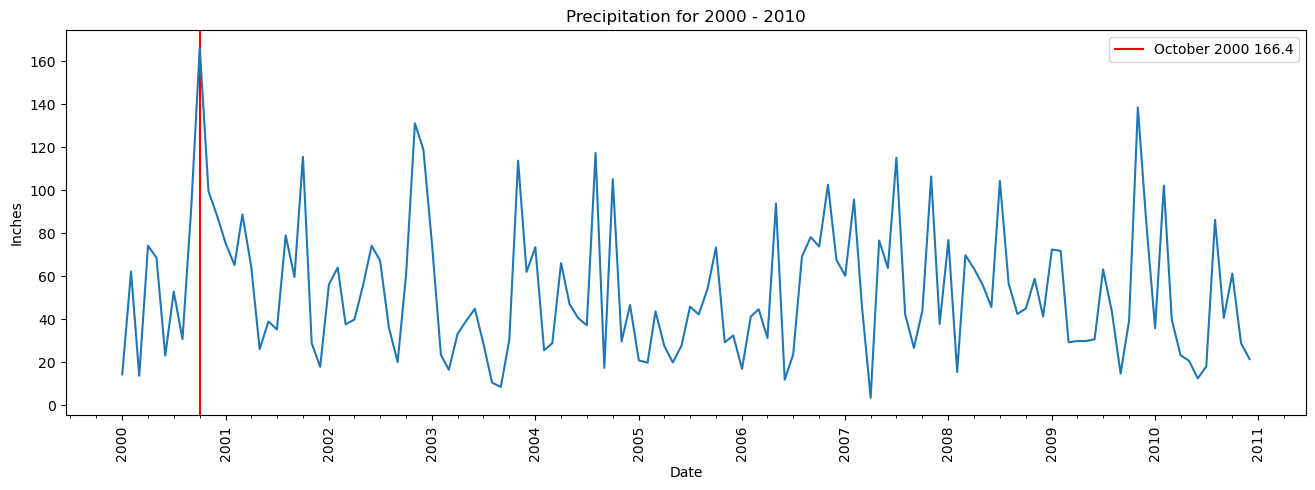

In [24]:
fig, ax = plt.subplots(figsize=(16,5))

ax.set(title='Precipitation for 2000 - 2010', ylabel='Inches', xlabel='Date')
plt.xticks(rotation=90)

# add years
loc_year = mdates.YearLocator()
year_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(year_fmt)

# customize minor ticks
minor_loc = mdates.MonthLocator(bymonth=[1,4,7,10])
ax.xaxis.set_minor_locator(minor_loc)

# plot month with max precipitaiton
ax.axvline(
    max_date, 
    color='r', label=(f'{max_date[0].strftime("%B %Y")} {max_val[0]}')
)

ax.plot(ts_ms_res)
plt.legend();

### Q2: Which year between 2000-2020 had the coolest average temperature?

In [25]:
# make copy of df and filter column/year
ts = df_filtered.loc['2000':,['mean_temp']].copy()
ts

,mean_temp
date,
2000-01-01,4.9
2000-01-02,5.0
2000-01-03,7.2
2000-01-04,4.4
2000-01-05,1.9
...,...
2020-12-27,7.6
2020-12-28,-1.3
2020-12-29,1.1


In [26]:
# Resample using agg .min
ts_as_res = ts.resample("AS").min()
ts_as_res

,mean_temp
date,
2000-01-01,-5.5
2001-01-01,-4.3
2002-01-01,-5.3
2003-01-01,-5.1
2004-01-01,-4.8
2005-01-01,-4.8
2006-01-01,-4.4
2007-01-01,-5.2
2008-01-01,-4.0


In [28]:
# identify min avg date
min_date = ts_as_res.idxmin()
min_date

mean_temp   2010-01-01
dtype: datetime64[ns]

In [29]:
# identify min avg temp
min_temp = ts_as_res.min()
min_temp

mean_temp   -9.4
dtype: float64

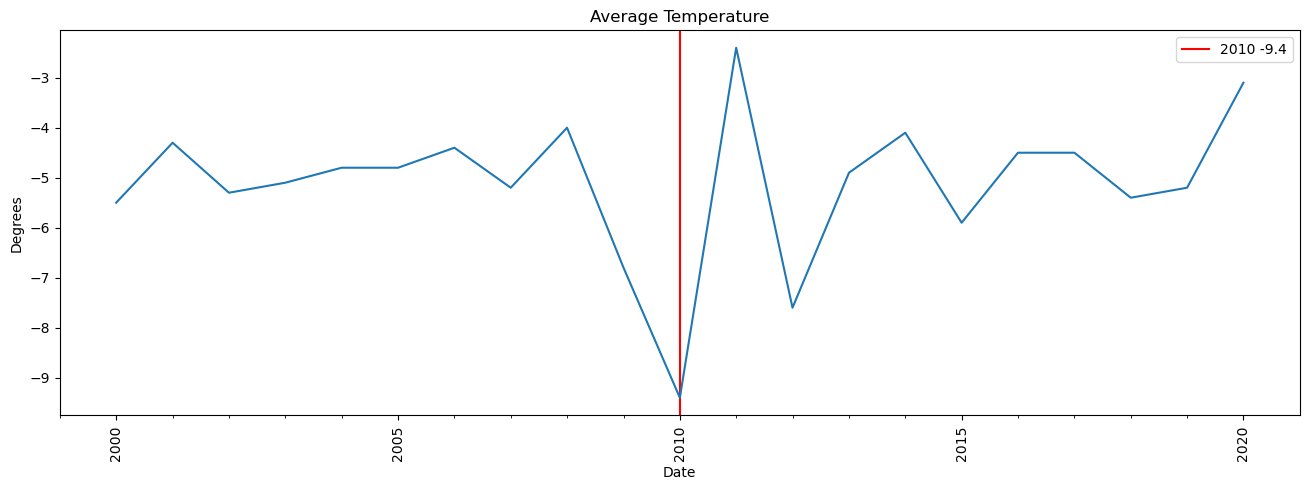

In [33]:
fig, ax = plt.subplots(figsize=(16,5))

ax.set(title='Average Temperature', ylabel='Degrees', xlabel='Date')
plt.xticks(rotation=90)

# add years
loc_year = mdates.YearLocator(5)
year_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(year_fmt)

# customize minor ticks
minor_loc = mdates.YearLocator()
ax.xaxis.set_minor_locator(minor_loc)

# plot month with max precipitaiton
ax.axvline(
    min_date, 
    color='r', label=(f'{min_date[0].strftime("%Y")} {min_temp[0]}')
)

ax.plot(ts_as_res)
plt.legend();